In [1]:
#import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
from datetime import datetime
import requests

###### sets up the open weather map API

In [2]:
#sets the base URL to for the weather map API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
#creates a set of random ;latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)

#zips both functions having the same index in their respective array into a tuple
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#adds the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [5]:
#creates a list for holding the cities
cities = []

#identify the nearest city for each coordinates
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if city is unique then will be added to the cities list
    if city not in cities:
        cities.append(city)
len(cities)

620

In [6]:
#creates an empty list to hold the weather data
city_data =[]

#print the beginning of the logging
print('Beginning Data Retrieval     ')
print('-----------------------------')

#creates counters
record_count = 1
set_count = 1

#loops through all the cities in our list
for i, city in enumerate(cities):
    
    #groups cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    #creates the endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    #logs the URl, records and set numbers and the city
    print(f'Processing Record {record_count} of set {set_count} | {city}')
    
    #adds 1 to the record count
    record_count += 1
        #Run an API request for each of the cities
    try:
        #parses the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        
        #parses the data that we need
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        #converts the date into ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        #appends the city information into the city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
    
    #if an error is experienced. skip the city
    except:
        print('City not found. Skipping...')
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | port alfred
Processing Record 2 of set 1 | palabuhanratu
City not found. Skipping...
Processing Record 3 of set 1 | saldanha
Processing Record 4 of set 1 | aksu
Processing Record 5 of set 1 | hobart
Processing Record 6 of set 1 | amahai
Processing Record 7 of set 1 | avarua
Processing Record 8 of set 1 | trinidad
Processing Record 9 of set 1 | clyde river
Processing Record 10 of set 1 | airai
Processing Record 11 of set 1 | marawi
Processing Record 12 of set 1 | khatanga
Processing Record 13 of set 1 | punta arenas
Processing Record 14 of set 1 | albany
Processing Record 15 of set 1 | myitkyina
Processing Record 16 of set 1 | ushuaia
Processing Record 17 of set 1 | green river
Processing Record 18 of set 1 | buraydah
Processing Record 19 of set 1 | hermanus
Processing Record 20 of set 1 | grand river south east
City not found. Skipping...
Processing Record 21 of set 1 | gao
Processing Record 22 o

Processing Record 39 of set 4 | shingu
Processing Record 40 of set 4 | jiazi
Processing Record 41 of set 4 | birao
Processing Record 42 of set 4 | barybino
Processing Record 43 of set 4 | arona
Processing Record 44 of set 4 | bukachacha
Processing Record 45 of set 4 | road town
Processing Record 46 of set 4 | yining
Processing Record 47 of set 4 | talnakh
Processing Record 48 of set 4 | fayaoue
Processing Record 49 of set 4 | chuy
Processing Record 50 of set 4 | luancheng
Processing Record 1 of set 5 | jamestown
Processing Record 2 of set 5 | guerrero negro
Processing Record 3 of set 5 | nago
Processing Record 4 of set 5 | biggar
Processing Record 5 of set 5 | birjand
Processing Record 6 of set 5 | caraquet
Processing Record 7 of set 5 | tiksi
Processing Record 8 of set 5 | atherton
Processing Record 9 of set 5 | barentsburg
City not found. Skipping...
Processing Record 10 of set 5 | tiznit
Processing Record 11 of set 5 | husavik
Processing Record 12 of set 5 | louisbourg
City not foun

Processing Record 28 of set 8 | vila franca do campo
Processing Record 29 of set 8 | phetchaburi
Processing Record 30 of set 8 | satitoa
City not found. Skipping...
Processing Record 31 of set 8 | urucui
Processing Record 32 of set 8 | lhokseumawe
Processing Record 33 of set 8 | rorvik
Processing Record 34 of set 8 | lompoc
Processing Record 35 of set 8 | el alto
Processing Record 36 of set 8 | taunggyi
Processing Record 37 of set 8 | sengiley
Processing Record 38 of set 8 | cikupa
Processing Record 39 of set 8 | vila do maio
Processing Record 40 of set 8 | karaul
City not found. Skipping...
Processing Record 41 of set 8 | stornoway
Processing Record 42 of set 8 | itoman
Processing Record 43 of set 8 | san ramon
Processing Record 44 of set 8 | clarksburg
Processing Record 45 of set 8 | dudinka
Processing Record 46 of set 8 | cap malheureux
Processing Record 47 of set 8 | pangnirtung
Processing Record 48 of set 8 | mohgaon
Processing Record 49 of set 8 | apastovo
Processing Record 50 of

Processing Record 15 of set 12 | kingisepp
Processing Record 16 of set 12 | rio gallegos
Processing Record 17 of set 12 | havoysund
Processing Record 18 of set 12 | lorengau
Processing Record 19 of set 12 | lipari
Processing Record 20 of set 12 | marshall
Processing Record 21 of set 12 | shetpe
Processing Record 22 of set 12 | namibe
Processing Record 23 of set 12 | abonnema
Processing Record 24 of set 12 | sayyan
Processing Record 25 of set 12 | tabou
Processing Record 26 of set 12 | umm ruwabah
City not found. Skipping...
Processing Record 27 of set 12 | aklavik
Processing Record 28 of set 12 | gangotri
City not found. Skipping...
Processing Record 29 of set 12 | show low
Processing Record 30 of set 12 | leningradskiy
Processing Record 31 of set 12 | gallup
Processing Record 32 of set 12 | changji
Processing Record 33 of set 12 | bahia blanca
Processing Record 34 of set 12 | saucesti
City not found. Skipping...
Processing Record 35 of set 12 | dabrowa tarnowska
Processing Record 36 o

In [7]:
#convert the array of dictionaries to a Pandas Dataframe
city_data_df = pd.DataFrame(city_data)

#new column order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
#city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2021-02-05 19:15:22,-33.5906,26.8910,69.01,94,100,4.00
1,Saldanha,ZA,2021-02-05 19:15:22,-33.0117,17.9442,66.20,77,0,11.50
2,Aksu,CN,2021-02-05 19:15:22,41.1231,80.2644,26.28,85,84,3.18
3,Hobart,AU,2021-02-05 19:15:19,-42.8794,147.3294,64.99,94,90,5.75
4,Amahai,ID,2021-02-05 19:15:23,-3.3333,128.9167,79.02,79,100,5.26
5,Avarua,CK,2021-02-05 19:15:23,-21.2078,-159.7750,82.40,74,93,5.75
6,Trinidad,BO,2021-02-05 19:13:58,-14.8333,-64.9000,87.80,58,40,13.80
7,Clyde River,CA,2021-02-05 19:15:23,70.4692,-68.5914,-16.60,76,75,12.66
8,Airai,TL,2021-02-05 19:15:23,-8.9266,125.4092,61.50,100,100,3.00
9,Marawi,PH,2021-02-05 19:15:23,7.9986,124.2928,73.00,92,92,5.01


In [8]:
#creates the output file (CSV)
output_data_file = 'weather_data/cities.csv'

#exports city_data_df into a csv
city_data_df.to_csv(output_data_file, index_label = 'City_ID')

In [9]:
#extracts the relevant fields from city_data_df for plotting
lats = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']


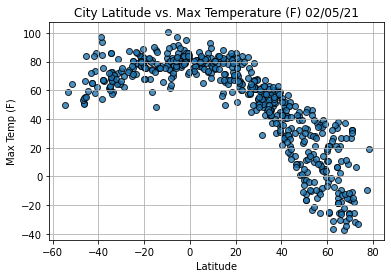

In [10]:
#imports time module
import time

#builds the scatter plot for Latitude vs. Max Temp
plt.scatter(lats,
           max_temp,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature (F) ' + time.strftime('%x'))
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')
plt.grid(True)

#saves the figure
plt.savefig('weather_data/Fig1.png')

#shows plot
plt.show()

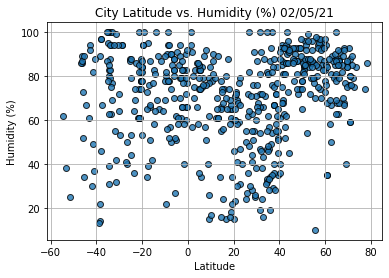

In [11]:
#builds the scatter plot for Latitude vs.Humidity
plt.scatter(lats,
           humidity,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity (%) ' + time.strftime('%x'))
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

#saves the figure
plt.savefig('weather_data/Fig2.png')

#shows plot
plt.show()

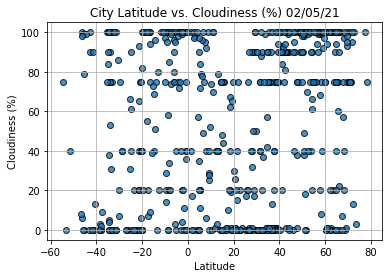

In [12]:
#builds the scatter plot for Latitude vs. Cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness (%) ' + time.strftime('%x'))
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

#saves the figure
plt.savefig('weather_data/Fig3.png')

#shows plot
plt.show()

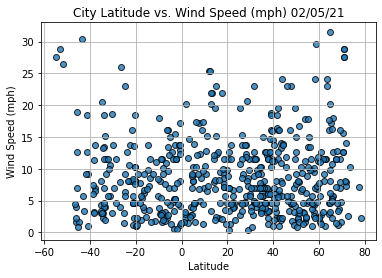

In [13]:
#builds the scatter plot for Latitude vs. Wind Speed
plt.scatter(lats,
           wind_speed,
           edgecolor = 'black',
           linewidths = 1,
           marker = 'o',
           alpha = 0.8,
           label = 'Cities')

#incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed (mph) ' + time.strftime('%x'))
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)

#saves the figure
plt.savefig('weather_data/Fig4.png')

#shows plot
plt.show()

In [29]:
from scipy.stats import linregress

#creates a function to create perform linear regression on the weather data
#and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #runs regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculates the regression line 'y values' from the slope and intercept
    regress_values = x_values * slope + intercept
    
    #gets the equation of the line
    line_eq = 'y = ' +str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
    
    #creates the scatter plot and plots the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, 'r')
    
    #annotates the test for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize = 15, color = 'red')
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show

###### Creates a scatter plot and line of regression for Northern/Southern hemisphere

In [31]:
#creates a Northern and Southern Hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] < 0)]

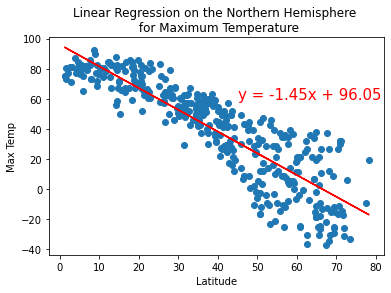

In [39]:
#linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#calls the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',
                       (45,60))

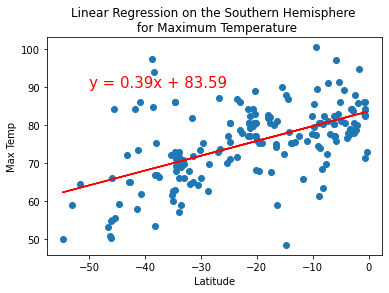

In [52]:
#linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#calls the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',
                       (-50,90))

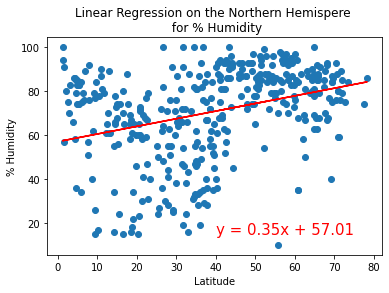

In [54]:
#linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#calls the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemispere \n for % Humidity',
                      '% Humidity',
                      (40,15))

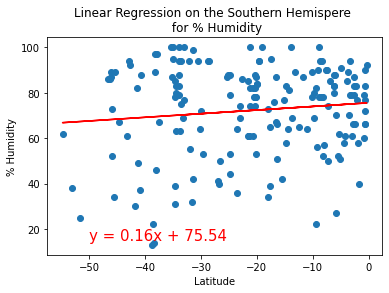

In [56]:
#linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#calls the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemispere \n for % Humidity',
                      '% Humidity',
                      (-50,15))

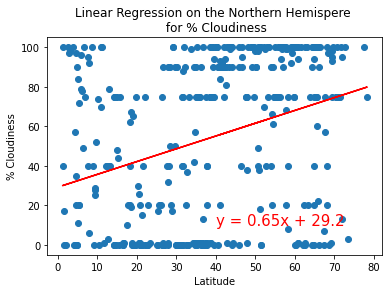

In [58]:
#linear regression on the northern hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#calls the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemispere \n for % Cloudiness',
                      '% Cloudiness',
                      (40,10))

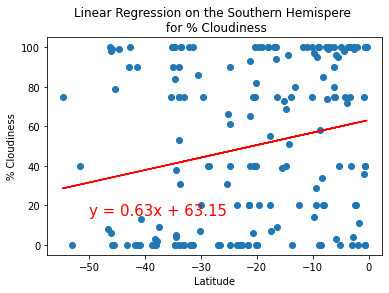

In [60]:
#linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#calls the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemispere \n for % Cloudiness',
                      '% Cloudiness',
                      (-50,15))

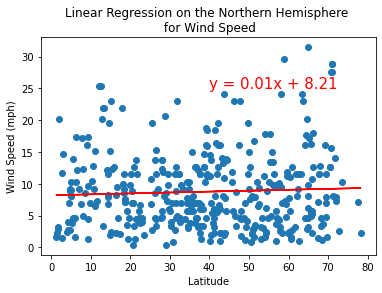

In [66]:
#linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Calls the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed (mph)',
                       (40,25))

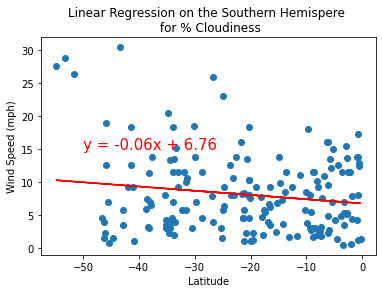

In [67]:
#linear regression on the southern hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#calls the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemispere \n for % Cloudiness',
                      'Wind Speed (mph)',
                      (-50,15))

###### Set up google maps and places API